### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

### Define the class

In [0]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture and learning rate
               
        self.num_inputs = architecture[0]
        self.num_hidden = architecture[1]
        self.num_neurons = architecture[2]
        self.num_outputs = architecture[3]
   
        self.learningR = alpha
        
        self.weights0 = np.random.randn(self.num_inputs,self.num_neurons)
        self.b0 = np.random.randn(self.num_neurons)
        
        self.weightsT = np.zeros((self.num_hidden-1, self.num_neurons, self.num_neurons))
        self.biasT = np.random.randn(self.num_hidden-1, self.num_neurons)
        
        
        
        # Initialize hidden layers and bias        
        for i in range (self.num_hidden-1):
          
          self.weightsT[i] = np.random.randn(self.num_neurons, self.num_neurons)
           
          
        # Initialize last hidden layer and last bias
        self.out_weights = np.random.randn(self.num_neurons, self.num_outputs)
        self.out_bias = np.random.randn(self.num_outputs)
       
            
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self,X):  
        # applies the softmax function to a set of values
        
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        
        return x * (1 - x)
    
    def predict(self, inputs):
        # TODO: Define the predict function
        level0 = inputs
        
        self.levels = np.zeros((self.num_hidden,inputs.shape[0],self.num_neurons))
        
        for i in range(self.num_hidden):
          
          if i == 0:
            
            self.levels[i] = self.softmax(np.dot(level0, self.weights0)+self.b0)
            
          else:
            
            self.levels[i] = self.softmax(np.dot(self.levels[i-1], self.weightsT[i-1])+self.biasT[i-1])
                      
        prediction = self.softmax(np.dot(self.levels[len(self.levels)-1], self.out_weights)+self.out_bias)
                       
        return prediction
          
    
    def train(self, inputs, labels, epochs = 10000, displayUpdate = 1000):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        
        errors = []
        
        for epoch in range (epochs):
          
          prediction = self.predict(inputs)
                  
          level1 = self.levels[self.num_hidden - 1]
                  
          level_error = labels - prediction
          
          if epoch%displayUpdate == 0:
                print("ERROR ", np.mean(np.abs(level_error)))
                
          errors.append(np.average(np.abs(level_error)))
          
          level_delta = level_error * self.sigmoid_deriv(prediction) 
          
          b_delta = np.sum(level_delta)  
          
          self.out_bias += b_delta * self.learningR
          
          level_error = np.dot(level_delta, self.out_weights.T)
          
          self.out_weights += np.dot(level1.T, level_delta) * self.learningR

          level_delta = level_error * self.sigmoid_deriv(level1)
          
          for i in range (self.num_hidden -1):
            
            b_delta = np.sum(level_delta)
            
            self.biasT[len(self.biasT) -i -1] += b_delta * self.learningR
            
            level_error =  np.dot(level_delta, self.weightsT[len(self.weightsT)-i-1])
            
            self.weightsT[len(self.weightsT)-i -1] += np.dot(self.levels[len(self.levels)-i-2].T, level_delta)
            
            level_delta = level_error * self.sigmoid_deriv(self.levels[len(self.levels)-i-2])
            
          b_delta = np.sum(level_delta)
          
          self.weights0 += np.dot(inputs.T, level_delta) * self.learningR 
          
          self.b0 += b_delta * self.learningR  
          
        return errors
            
                   
                    
          

### Test datasets

#### XOR

In [0]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T

classes_labels = np.array([0]*2 + [1]*2)

classes_one_hot_labels = np.zeros((4, 2))

for i in range(4):  
    classes_one_hot_labels[i, XOR_labels[i]] = 1

ERROR  0.5000334610367607
ERROR  0.49879893597768465
ERROR  0.403205964053087
ERROR  0.08395425770663131
ERROR  0.04765186805211094
ERROR  0.036774395505410784
ERROR  0.03105456989046463
ERROR  0.027390230967337198
ERROR  0.024786436267178656
ERROR  0.02281348549198562
Prediction:  [0.9855297 0.0144703]


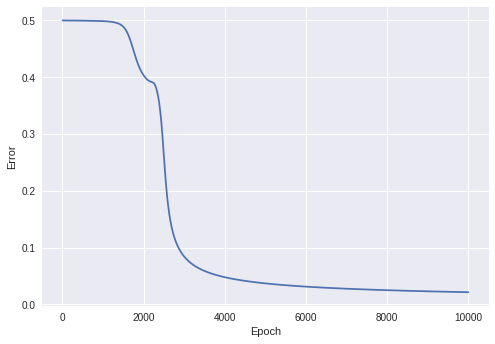

In [17]:
#TODO: Test the class with the XOR data
# DATA
     
#num_inputs, num_hidden, num_neurons, num_outputs
architecture = [2, 3, 6, 2]
neural_network = NeuralNetwork(architecture, 0.1)
errors = neural_network.train(XOR_inputs, classes_one_hot_labels)

print("Prediction: ",neural_network.predict(XOR_inputs)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### Multiple classes

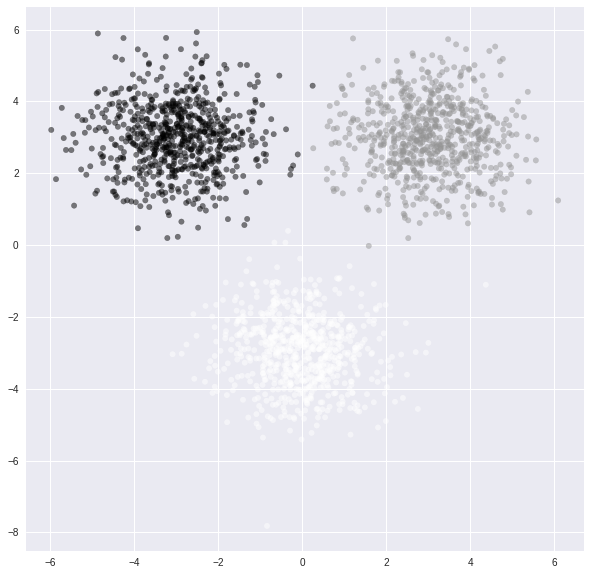

In [18]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

ERROR  0.28893016227879
ERROR  0.004117398491365279
ERROR  0.0027625090146486562
ERROR  0.002162873518041554
ERROR  0.0018059636332361728
ERROR  0.0015641554715163522
ERROR  0.001387623796109597
ERROR  0.0012522340660602678
ERROR  0.001144674574760774
ERROR  0.0010569245159639323
 Prediction:  [9.91834572e-01 7.43347717e-03 7.31950592e-04]


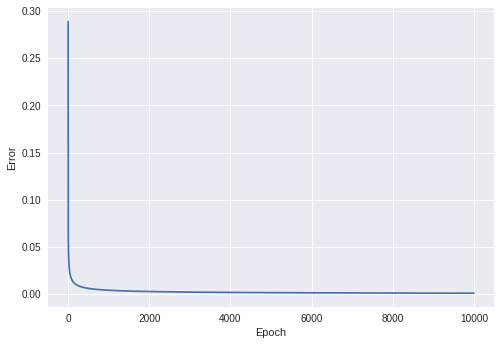

In [19]:
#TODO: Test the class with the multiple classes data
#num_inputs, num_hidden, num_neurons, num_outputs
architecture = [2, 1, 5, 3]
neural_network2 = NeuralNetwork(architecture, 0.01)

errors2 = neural_network2.train(feature_set, one_hot_labels)


test = np.array([[0,0]])

print(" Prediction: ",neural_network2.predict(test)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors2)




#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

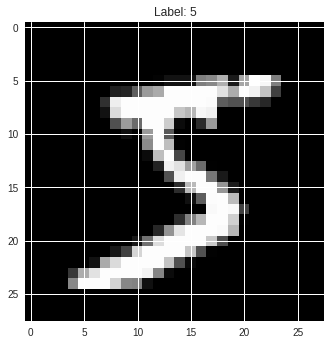

In [20]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [0]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

ERROR  0.1798787740674026
ERROR  0.13741484204208446
ERROR  0.10994254732172633
ERROR  0.10004734378825038
ERROR  0.0968215351121925
ERROR  0.0891126872716436
ERROR  0.08290652553705566
ERROR  0.07882629344557353
ERROR  0.07914953031286448
ERROR  0.07308561361748032


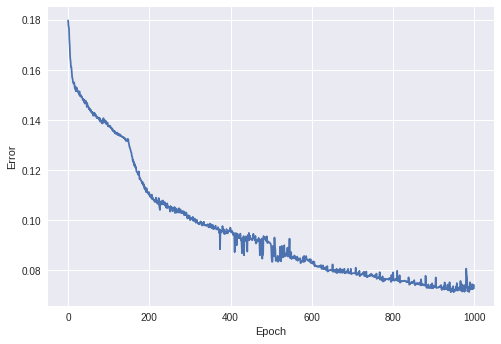

In [38]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.

architecture = [784, 2, 128, 10]
neural_network3 = NeuralNetwork(architecture, 0.01)

errors3 = neural_network3.train(train_images[0:5000],train_labels[0:5000], 1000, 100)

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors3)



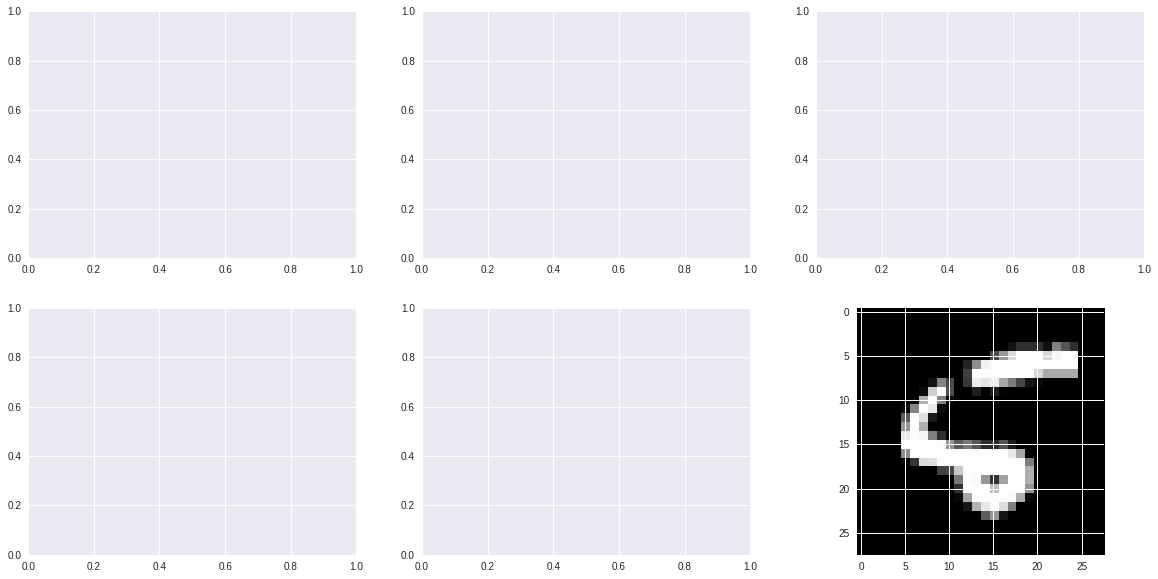

In [104]:
predictions = neural_network3.predict(test_images[0:10])

count = 0

error_images = []

for prediction in predictions:
  
  for i in range(len(prediction)):
    
    if prediction[i] < 0.5:
      
      prediction[i] = 0
      
    else:
      prediction[i] = 1
    
  if not np.array_equiv(prediction,test_labels[count]):
       
    error_images.append(count)
    
    
  count +=1
    
np.set_printoptions(precision=3, suppress= True)

f, plots = plt.subplots((len(error_images)), 3, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]


for index, plot in zip (error_images, plots):
  plt.imshow(test_images[index].reshape(28,28), cmap="gray")

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**
there are traces that are very similar in some images as in others, it may be confused a 1 with a 7 by the angle in which they were drawn.

2. **What could you try doing to improve the classification accuracy?**
better training, modification of hyperparameters, a larger training set could improve the classification of images